Include Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

Load the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

Download and extract the dataset

In [3]:
!wget $url -O bank-additional.zip
!unzip bank-additional.zip

--2024-09-04 23:10:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [   <=>              ] 434.15K   670KB/s    in 0.6s    

2024-09-04 23:10:37 (670 KB/s) - ‘bank-additional.zip’ saved [444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


Load the data from the extracted CSV file

In [4]:
data = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

Display the first few rows of the dataset

In [5]:
print("Dataset preview:\n", data.head())

Dataset preview:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euri

#Preprocessing the data
Convert categorical variables to numeric using LabelEncoder

In [6]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

Define features and target variable

In [7]:
X = data.drop(columns=['y'])
y = data['y']

Split the dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize the Decision Tree Classifier

In [9]:
clf = DecisionTreeClassifier(random_state=42)

Train the model

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions

In [11]:
y_pred = clf.predict(X_test)

Evaluate the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8893


Classification report

In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



Confusion matrix

In [14]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10275   693]
 [  675   714]]


Visualize the Decision Tree

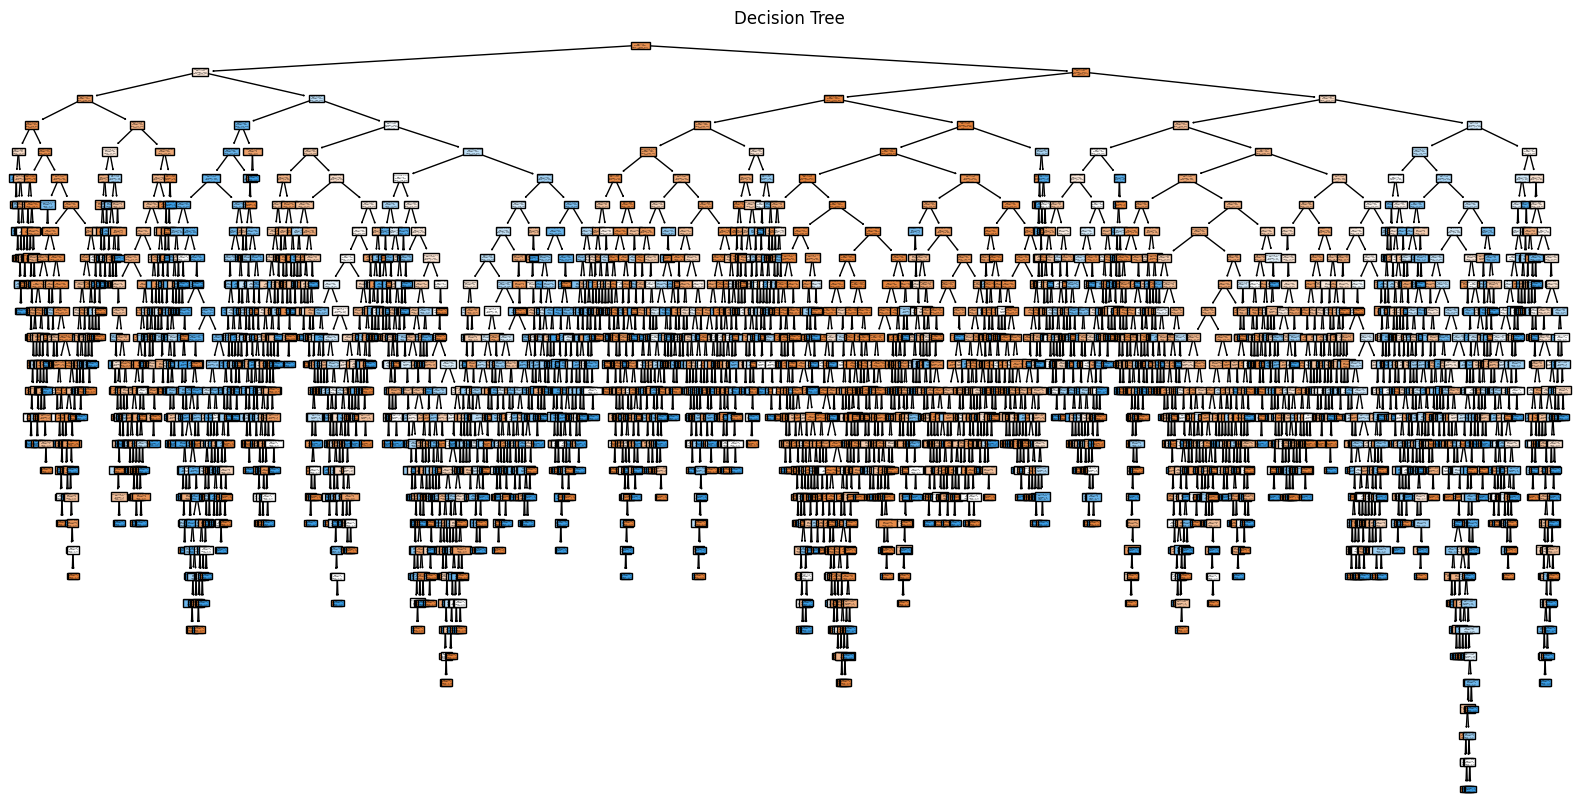

In [15]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_)
plt.title("Decision Tree")
plt.show()